Tests OpenCv, VTK, ITK et Slicer 3d

In [18]:
# Imports de bibliothèques

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import dicom
import dicom_numpy
import os
import radiomics
from skimage import io
import SimpleITK as sitk
import collections

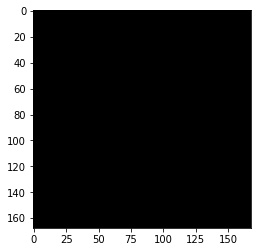

In [2]:
I = cv2.imread('D:/Centrale Nantes/Projet/data/001-026/l1/40/PT - A2 - 4_Structure 000 (% Max=40)_T1_Masque_14')
plt.imshow(I)
plt.show()

Création d'un dossier de 10 fichiers dicom

In [ ]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk("tests/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

for d in DOSSIER:
    f = dicom.read_file(d)
    I=f.pixel_array
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap='gray')
    plt.show()

Construction d'une image 3D grâce à dicom_numpy

In [3]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk("tests/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

datasets = [dicom.read_file(d) for d in DOSSIER]

voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)

print(np.shape(voxel_ndarray))
print(ijk_to_xyz)


(168, 168, 324)
[[   4.0728302     0.            0.         -337.5123291 ]
 [   0.            4.0728302     0.         -480.49365234]
 [   0.            0.            3.          740.5       ]
 [   0.            0.            0.            1.        ]]


Création du masque

In [4]:
mask = np.zeros((168,168,324))
for i in range(1,8):
    m = io.imread("tests/l"+str(i)+"/kmean.tif")
    print(m.T.shape)
    m = m.T
    mask += m

# Remettre le masque en binaire
[x,y,z]=mask.shape
for i in range(x):
    for j in range(y):
        for k in range(z):
            if mask[i,j,k]>1:
                mask[i,j,k] = 1

# Visualisation du masque
# for z in range(0,324):
#     plt.imshow(mask[:,:,z],cmap='gray')
#     plt.show()

(168, 168, 324)
(168, 168, 324)
(168, 168, 324)
(168, 168, 324)
(168, 168, 324)
(168, 168, 324)
(168, 168, 324)


In [5]:
R = radiomics.featureextractor.RadiomicsFeaturesExtractor()
print(R)
R.enableAllFeatures()
print(R.getFeatureClassNames())
R.getFeatureNames('glcm')

# Conversion array ==> simpleITK
image = sitk.GetImageFromArray(voxel_ndarray)
mask = sitk.GetImageFromArray(mask)

Dico = R.execute(image, mask)

dict_keys(['firstorder', 'glcm', 'gldm', 'glrlm', 'glszm', 'ngtdm', 'shape'])


In [37]:
F = radiomics.glcm.RadiomicsGLCM(image, mask)
F.getAutocorrelationFeatureValue()

for attribut in radiomics.glcm.RadiomicsGLCM:
    print(attribut.nom)

TypeError: 'type' object is not iterable